# MNIST Classification with Sklearn

Importing the libraries and the datasets

In [88]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve

%matplotlib inline

We are going to import the dataset, the classical MNIST set with handwritten digits between 0 and 9, from the sklearn datasets libraries. Also we are going to call DESCR method to see info about the dataset 

In [56]:
mnist = fetch_openml('mnist_784', version = 1)

mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

Now we are going to define the X (features) and the y (target), and see with the shape method the number of featured (predictor variables) and the number os instances that we have for doing the train and the test.

In [57]:
X, y = mnist.data, mnist.target

print(' X -- Instances, columns = ', X.shape, '\n', 'y -- Columns = ', y.shape)

 X -- Instances, columns =  (70000, 784) 
 y -- Columns =  (70000,)


The features represent 784 pixels, which are binary values depending on whether they are filled (1) or empty (0), so they are numeric (float).

In [58]:
X.dtype

dtype('float64')

However the target variable is not a numerical variable, which is the type that most sklearn algorithms need to perform so we must transform the y in it.

In [59]:
print('y before transformation --> ', y.dtype)

y = y.astype('float')

print('y after transformation --> ', y.dtype)

y before transformation -->  object
y after transformation -->  float64


Now we are going to divide the instance in training and test set:

In [60]:
X_train, X_test, y_train, y_test = X[0:60000], X[60000:], y[:60000], y[60000:] # 60000 instances for traininig and the rest, 10000 for testing.

## Binary classifier

First we are going to train a binary classifier for detecting if the target number is a 7 or not, so we are going to change the float values of the y for booleans ('True' if y is equel 7, 'False' if is othe digit). For this purpouse we are going to choose a stochastic gradient descent classifier, because, if well perform a little bit worst that a regular gradient descent algorithm it suits better with big datasets like MNIST:

In [61]:
y_train7 = (y_train == 7) 
y_test7 = (y_test == 7)

In [62]:
sgd_clf = SGDClassifier()

sgd_clf.fit(X_train, y_train7)

SGDClassifier()

Now that we have our binary classifier trained, lets see how perform launching the 'score' method:

In [63]:
sgd_clf.score(X_test, y_test7) # AS we can see the algorithm detects pretty well if the class is a 7 or another number.

0.9794

Despite, as we have just seen, the classifier identifies the 7 with great precision, we are going to see a series of performance measures that can be applied to gain insights in other classifiers:

CROSS VALIDATION

In [66]:
cross_val_scores = cross_val_score(sgd_clf, X_train, y_train7, cv=6) # it comes from sklearn.model_selection import cross_val_score. 'cv' parameter are the value for the folds or minibatches that cross validation method splits the dataset to train apart one from the others, and launch predictions over the other folds to get the scores and see how the algorithm generalizes.

cross_val_scores 

array([0.9671, 0.983 , 0.9784, 0.9725, 0.9705, 0.9841])

As we can see above we can trust in our classifier for the scores obtained in cross validation.

CONFUSION MATRIX

In [83]:
y_pred_sgd = sgd_clf.predict(X_test) # First to call confusion matrix method we must get the predicted values from our target test set by our fitted classifier

confusion_matrix(y_test7, y_pred_sgd)

array([[8925,   47],
       [ 159,  869]])

The confusion matrix give us in a raw way how performs our classifier; it give us the 'true negatives' (it's the negative class, the number that aren't 7, that are well identified), the 'false positives' (number that are identified as positive class, digits that are 7, but they aren't), the 'false negatives' (digits that the classifier identifies as negative class but they really are 7) and the trupe positives (digits that classifier identifies as 7 and they really are). In conclussion we can say the confusion matrix give us a general way about how performs the classifier.

PRECISSION, RECALL AND F1 SCORE

Confusion matrix, as we said before, give us a general vision about the performance of the algorithm but the really interest thing of CM is that we can get more precission metrics about the performig.

In [72]:
precision_score(y_test7, y_pred) # precission is, between all the posives instances that our classifier identifies, the percentage that they really are.

0.9486899563318777

In [73]:
recall_score(y_test7, y_pred) # recall is the ratio of positive instances that are correctly detected by our algorithm between all the instances of our dataset.

0.8453307392996109

In [74]:
f1_score(y_test7, y_pred) # It's a metric that it's going to be a high score if the precission and recall have similar scores; so we use it if we want that our classifier be balanced in precission and recall terms. So for the score of the f1 we know that our precission and recall are very balanced, but it's more 

0.8940329218106996

We can not modify directly the precission or recall of our algorithms but  attending how the classifiers works, they give each instance a score through the decision function and in turn establish a threshold in which if the score obtained by the instance is greater than the threshold, the algorithm identifies the instance as a positive class and negative if not the score does not reach the threshold.

But sklearn allow us get the decission function, and use any trehold that we want (making a boolean) to make predictions based on that threshold, but I must research hoe do it properly... (To be continued)

One important thing about precission and recall metrics are that there is an inherent trade-off between the: If you want to increase the precission the recall is going to decrease and viceversa. To get insights about this we are going to get some visualizations of the data:

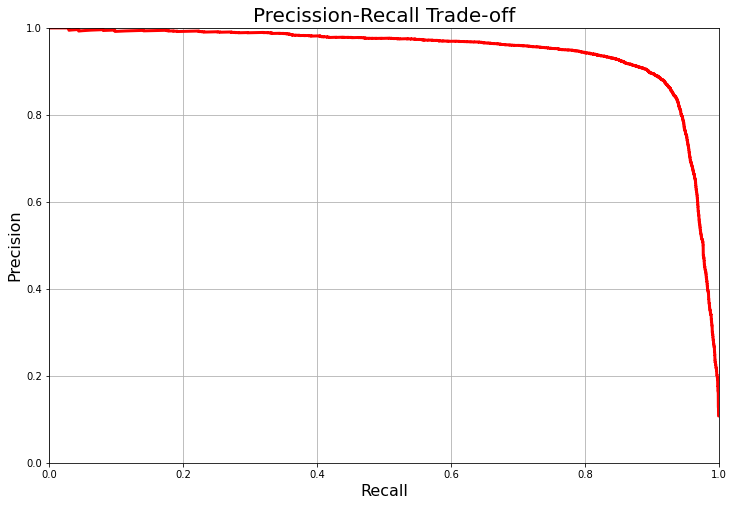

In [103]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train7, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train7, y_scores)

# FIGURE PARAMS

plt.figure(figsize=[12,8])

plt.plot(recalls, precisions, "r-", linewidth=2)

plt.title('Precission-Recall Trade-off', fontsize=20)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.grid(axis='both')

In the graph from above we can clearly see that 

## Multiclass Classification

Now lets goint to see how performs the SGD classifier for a multiclass classification